In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import numpy as np

In [2]:
data = pd.read_csv('Binance_XRPBTC_1h.csv')

In [4]:
data.head()

,Date,Symbol,Open,High,Low,Close,Volume XRP,Volume BTC
0,2019-12-11 02-AM,XRPBTC,0.000031,0.000031,0.000031,0.000031,73311,2.245
1,2019-12-11 01-AM,XRPBTC,0.000031,0.000031,0.000031,0.000031,942496,28.910
2,2019-12-11 12-AM,XRPBTC,0.000031,0.000031,0.000031,0.000031,1787941,55.080
3,2019-12-10 11-PM,XRPBTC,0.000031,0.000031,0.000031,0.000031,1438579,44.270
4,2019-12-10 10-PM,XRPBTC,0.000031,0.000031,0.000031,0.000031,1303223,39.970


In [49]:
def get_moving_average(window, data):
    total = len(data)
    moving_averages = [0]*(window//2)
    for block in tqdm(range(window, total)):
#         print(block-window, block)
        close = data[block-window : block+window]['Close']
        ma = close.mean()
        moving_averages.append(ma)
    return moving_averages

WINDOW1 = 200
WINDOW2 = 50

moving_averages = {WINDOW1:[], WINDOW2:[]}

# moving_averages = np.load(f'ma-{WINDOW1}-{WINDOW2}_XRPBTC.npy', allow_pickle=True)

moving_averages[WINDOW1] = get_moving_average(WINDOW1, data)
moving_averages[WINDOW2]= get_moving_average(WINDOW2, data)

np.save(f'ma-{WINDOW1}-{WINDOW2}_XRPBTC.npy', moving_averages)



100%|██████████████████████████████████████████████████████████████████████████| 18406/18406 [00:05<00:00, 3253.83it/s]


In [109]:
snap = []
x_axis = []
    
flip = False
prev_health = False

for i in range(1, len(moving_averages[WINDOW1])):
    long  = moving_averages[WINDOW1]
    short = moving_averages[WINDOW2]

    if long[i] != 0:
        
        if long[i] - short[i] > 0:
            health = True
        elif long[i] - short[i] < 0:
            health = False
            
        if health != prev_health:
#             print(health, prev_health)
            flip = True
        else:
            flip=False
        
        prev_health = health

        if flip:
            snap.append(long[i])
            x_axis.append(i)
    #         print('Filpped!')

print(f'Flipped {len(snap)} times!')

Flipped 69 times!


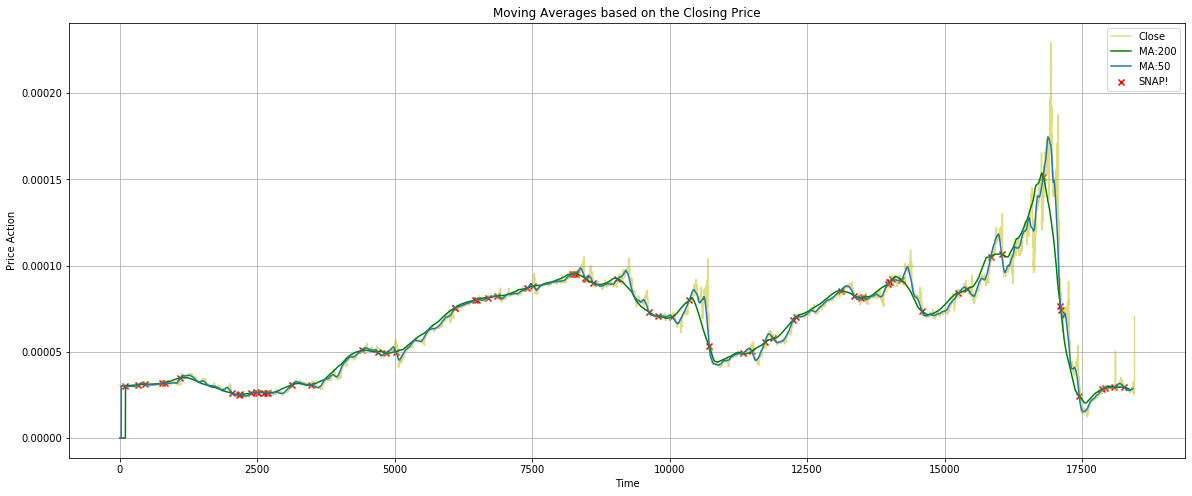

In [111]:
plt.figure(figsize=(20, 8))

plt.plot(data['Close'], label='Close', color='y', alpha=0.5)
plt.plot(moving_averages[WINDOW1], label=f'MA:{WINDOW1}', color='g')
plt.plot(moving_averages[WINDOW2], label=f'MA:{WINDOW2}')
plt.scatter(x_axis, snap, color='r', marker='x', label='SNAP!')

plt.xlabel('Time')
plt.ylabel('Price Action')
plt.title('Moving Averages based on the Closing Price')

plt.legend()
plt.grid(1)
plt.show()